In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
file_path ='resources/defenders.csv'
defenders_df = pd.read_csv(file_path)
defenders_df['rating'] = (defenders_df['potential'].astype(int) + defenders_df['overall'].astype(int))/2
defenders_df['rating'] = defenders_df['rating'].apply(np.int64)


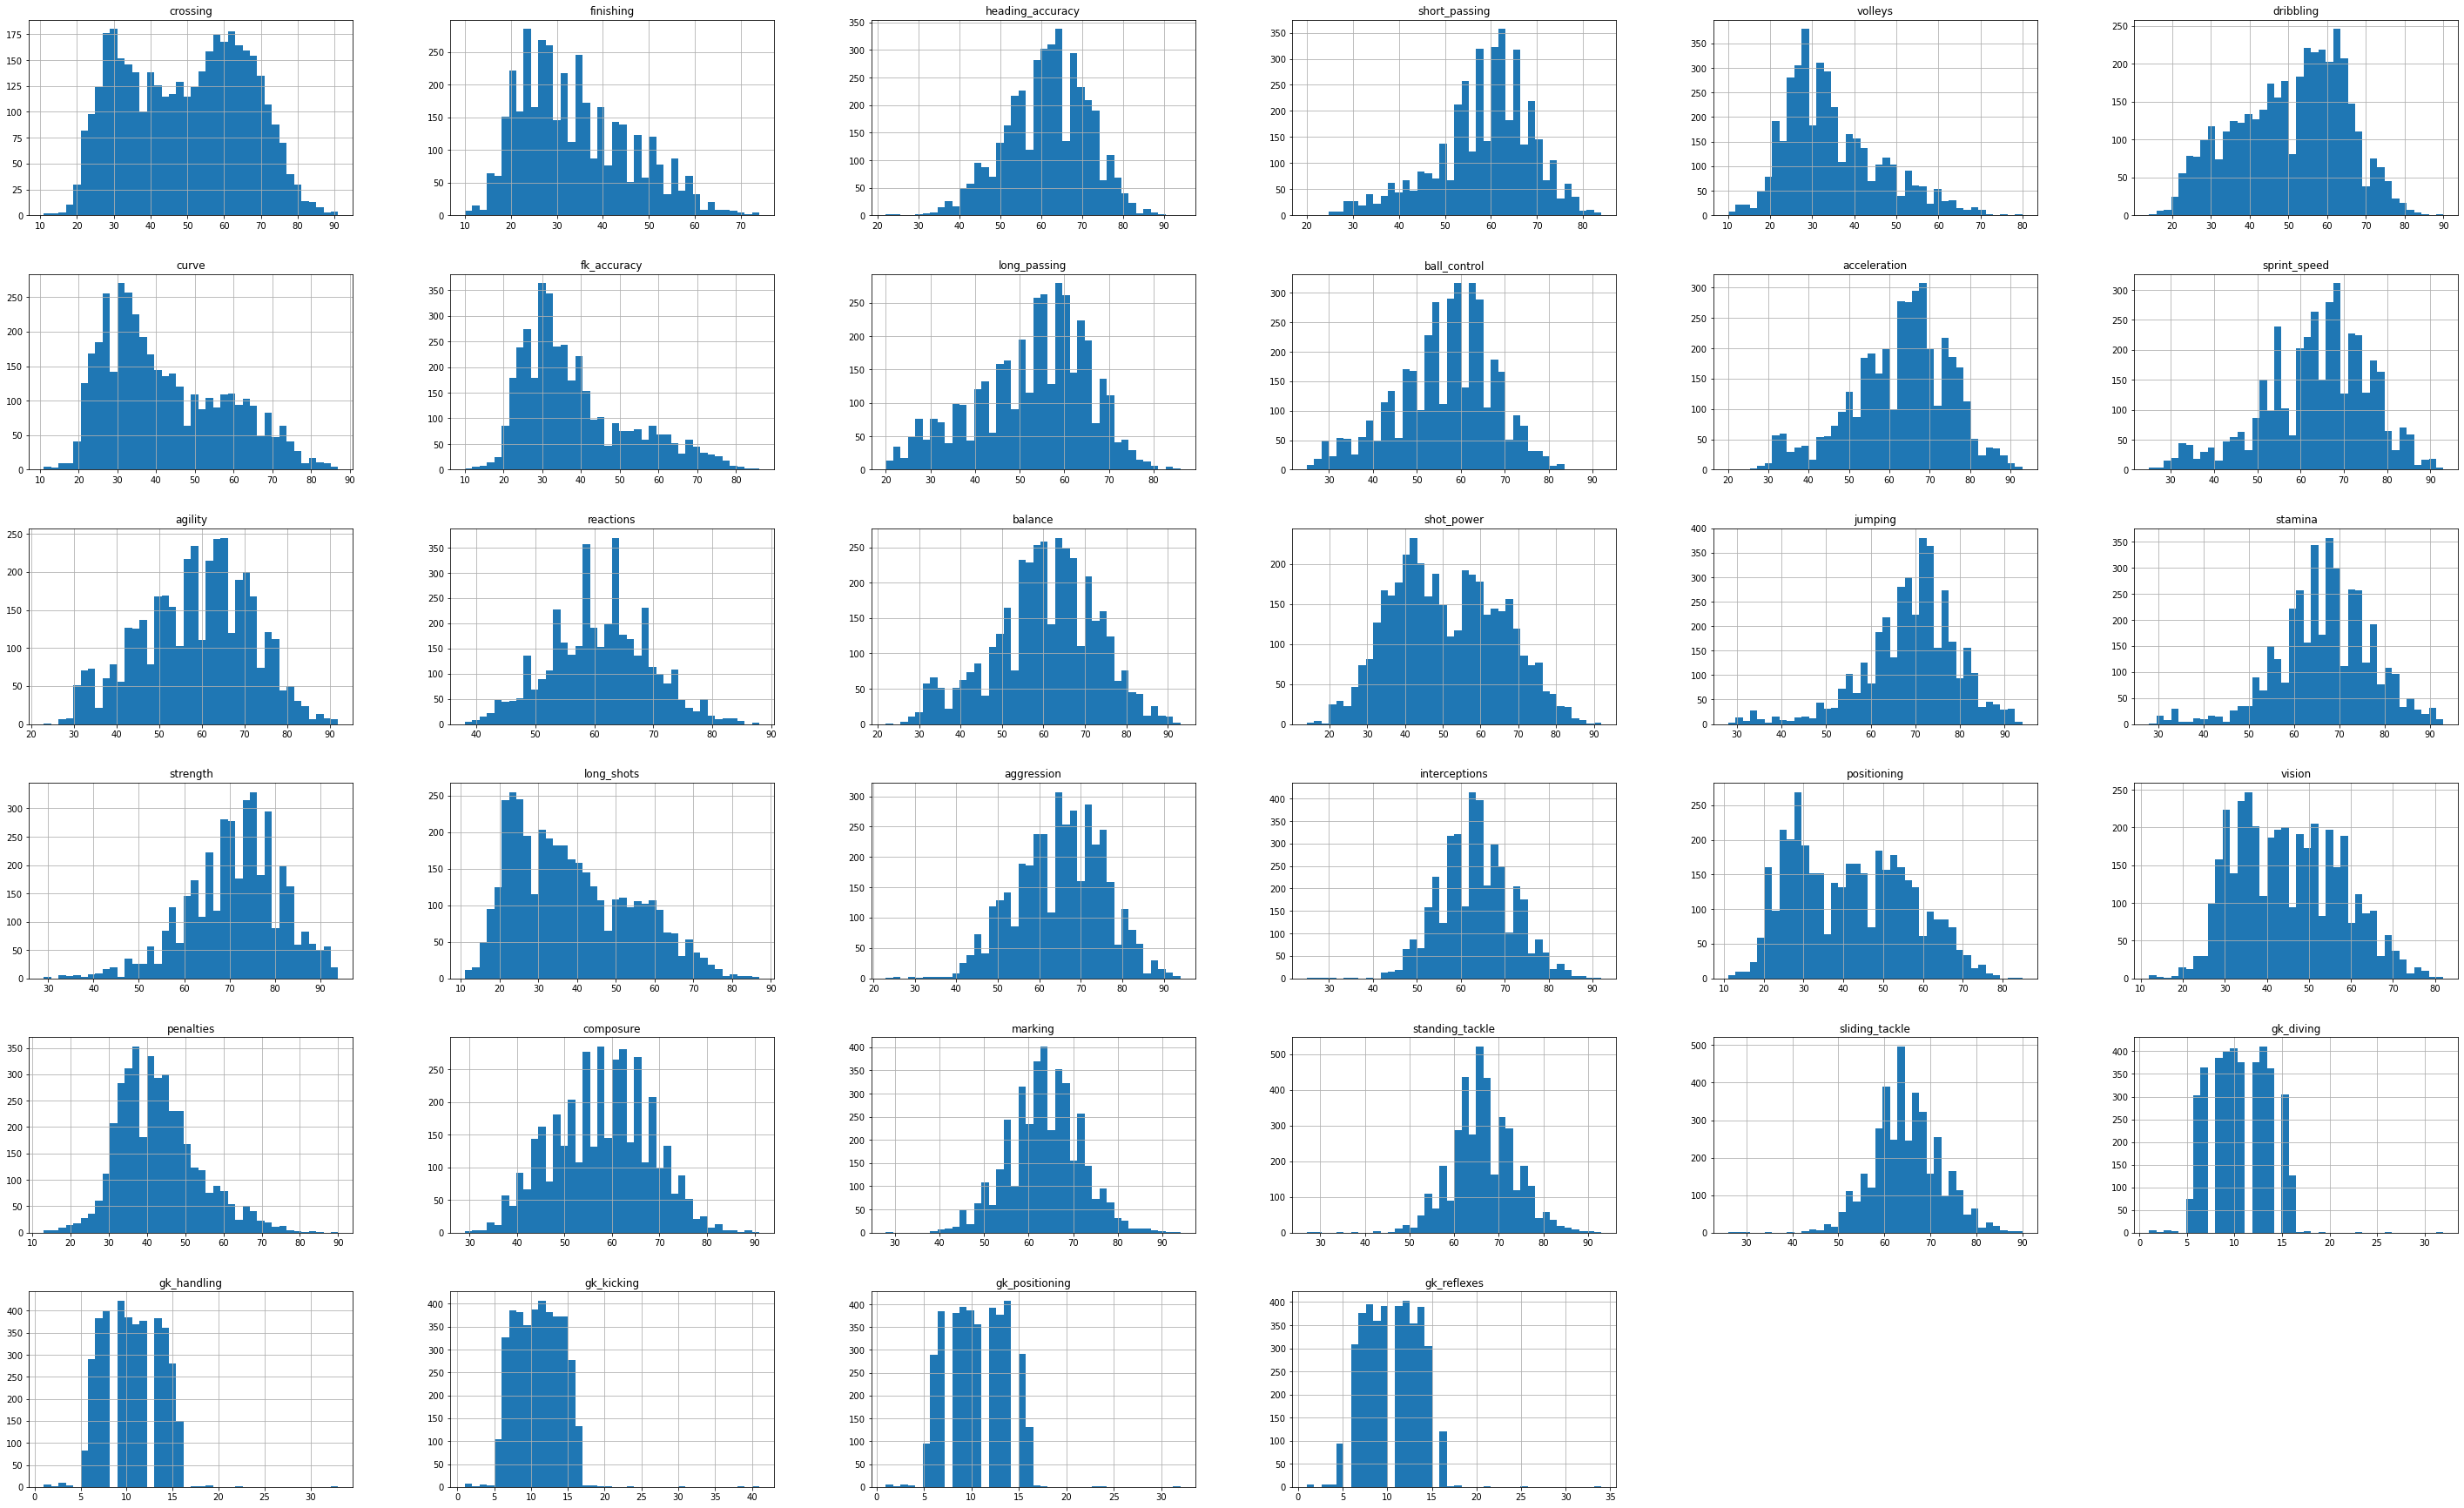

In [3]:
defenders_df.drop(['rating', 'weight', 'overall', 'potential'], axis = 1).hist(bins=40, figsize=(50,31))
plt.show()

In [4]:
defenders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   overall           3913 non-null   int64 
 1   potential         3913 non-null   int64 
 2   work_rate         3913 non-null   object
 3   field_position    3913 non-null   object
 4   height            3913 non-null   object
 5   weight            3913 non-null   object
 6   crossing          3913 non-null   int64 
 7   finishing         3913 non-null   int64 
 8   heading_accuracy  3913 non-null   int64 
 9   short_passing     3913 non-null   int64 
 10  volleys           3913 non-null   int64 
 11  dribbling         3913 non-null   int64 
 12  curve             3913 non-null   int64 
 13  fk_accuracy       3913 non-null   int64 
 14  long_passing      3913 non-null   int64 
 15  ball_control      3913 non-null   int64 
 16  acceleration      3913 non-null   int64 
 17  sprint_speed  

In [5]:
defenders_df.isna().any()

overall             False
potential           False
work_rate           False
field_position      False
height              False
weight              False
crossing            False
finishing           False
heading_accuracy    False
short_passing       False
volleys             False
dribbling           False
curve               False
fk_accuracy         False
long_passing        False
ball_control        False
acceleration        False
sprint_speed        False
agility             False
reactions           False
balance             False
shot_power          False
jumping             False
stamina             False
strength            False
long_shots          False
aggression          False
interceptions       False
positioning         False
vision              False
penalties           False
composure           False
marking             False
standing_tackle     False
sliding_tackle      False
gk_diving           False
gk_handling         False
gk_kicking          False
gk_positioni

In [6]:
list(defenders_df)

['overall',
 'potential',
 'work_rate',
 'field_position',
 'height',
 'weight',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'rating']

In [7]:
# Define Columns we will include
columns = ['height', 'weight','field_position', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 
           'volleys', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'acceleration',
           'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength',
           'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 
           'marking','standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling', 'gk_kicking', 'gk_positioning', 
           'gk_reflexes', 'work_rate', 'rating']

# Create varible for players by position 
#defenders = ['RWB', 'RCB', 'RB', 'LCB', 'CB', 'LWB', 'LB']

# Fit columns into df
defenders_df = defenders_df[columns]

#Print df
defenders_df

,height,weight,field_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,work_rate,rating
0,6'2,172lbs,CB,55,42,92,79,47,53,49,...,90,89,89,6,8,15,5,15,Medium,90
1,6'2,187lbs,LCB,58,33,83,59,45,58,60,...,93,93,90,3,3,2,4,3,Medium,89
2,6'3,203lbs,LCB,64,55,87,81,60,68,65,...,88,90,88,15,6,10,5,6,High,88
3,5'9,176lbs,LB,90,70,75,84,54,90,85,...,71,85,86,12,5,5,5,9,Medium,88
4,6'0,165lbs,CB,69,51,79,81,70,69,72,...,90,89,86,15,10,14,12,15,Medium,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,5'10,141lbs,CB,19,17,40,33,28,20,21,...,48,48,46,9,11,11,7,11,Medium,57
3909,5'8,159lbs,CB,28,23,45,27,24,25,21,...,42,54,54,6,11,12,13,5,Medium,53
3910,5'8,154lbs,LB,40,25,38,29,21,48,34,...,45,52,49,9,12,15,12,7,Medium,53
3911,6'2,163lbs,CB,25,22,43,30,29,22,27,...,42,51,49,14,11,7,11,8,Medium,56


In [8]:
#height Column
def clean_height(x):
    l=[]
    s=1
    if isinstance(x,str):
        l=x.split("'")
        i=int(l[0])
        j=int(l[1])
        s=((i*12)+j)/12
    return(s)


defenders_df['height'] = defenders_df['height'].apply(clean_height)
defenders_df['height'].fillna((defenders_df['height'].mean()), inplace = True)

In [9]:
#weight Column
def clean_weight(x):
    
    if isinstance(x,str):
        return(x.replace('lbs', ''))
    return(x)

defenders_df['weight'] = defenders_df['weight'].apply(clean_weight).astype('float')
defenders_df['weight'].fillna((defenders_df['weight'].mean()), inplace = True)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
defenders_df['work_rate'] = le.fit_transform(defenders_df['work_rate'])

In [11]:
#Create train_set and test_set
train_set, test_set = train_test_split(defenders_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(defenders_df))

target_train = train_set['rating']
train_set = train_set.drop(['rating'], axis = 1)

Length of training data: 3130
Length of testing data: 783
Length of total data: 3913


In [12]:
for position_value in defenders_df['field_position'].unique():
    
    corr_matrix = defenders_df[defenders_df['field_position'] == position_value].corr()['rating'].to_frame()
    temp_df = corr_matrix['rating'].sort_values(ascending=False)
    
    print(f'********** Current Position: {position_value}: \n ')
    
    print(temp_df)
    
    print('\n')

    print(f'-------------------------------------------------------------')
    
    print('\n')


********** Current Position: CB: 
 
rating              1.000000
standing_tackle     0.858818
interceptions       0.826725
sliding_tackle      0.824736
marking             0.799807
reactions           0.769671
heading_accuracy    0.754906
composure           0.688410
short_passing       0.670528
ball_control        0.649994
aggression          0.599080
long_passing        0.589692
dribbling           0.501677
shot_power          0.453606
strength            0.429264
vision              0.383031
long_shots          0.368909
curve               0.344962
crossing            0.344566
finishing           0.328771
penalties           0.316525
volleys             0.291961
fk_accuracy         0.287040
positioning         0.273437
weight              0.244476
stamina             0.227418
jumping             0.180454
height              0.179845
agility             0.177253
sprint_speed        0.155530
acceleration        0.069338
gk_diving           0.032483
gk_kicking          0.029682
gk_posi

In [13]:
for position in defenders_df['field_position'].unique(): 
    
    try:
    
        # Subset by position
        temp_df = defenders_df[defenders_df['field_position'] == position]

        # Find correlations
        temp_corr = defenders_df[defenders_df['field_position'] == position].corr()['rating'].to_frame()
        temp_corr = temp_corr[temp_corr['rating'] > 0.5]


        # Keep only columns with correltion above 0.5
        temp_features = list(temp_corr.T)
        temp_model_df = temp_df[temp_features]

        #print(temp_features)
        # Split data into train and test, isolate y (target/dependent variable)
        train_set, test_set = train_test_split(temp_model_df, test_size=0.2, random_state=42)
        target_train = train_set['rating']
        train_set = train_set.drop(['rating'], axis = 1) #, 'potential', 'overall'], axis = 1)
        

        # Fit model
        train_set = sm.add_constant(train_set, prepend=False)

        # Fit and summarize OLS model
        mod = sm.OLS(target_train, train_set)

        res = mod.fit()
        
        features = pd.DataFrame([res.pvalues, res.params]).T
        features.columns = ['P-value', 'Coefficient']
        features = features[features['P-value']<0.05]
        features = features.sort_values(by = 'Coefficient', ascending = False)
    

        print(f' ********* Current Position: {position}: \n ')
        print(f' ********* Significant features in order of impact: {features.index}: \n ')
        print(res.summary())
        print('\n')
        
    except BaseException as e: 
        print(f'WARNING: SKIPPING {position} due to {e}')

 ********* Current Position: CB: 
 
 ********* Significant features in order of impact: Index(['const', 'standing_tackle', 'marking', 'interceptions',
       'heading_accuracy', 'sliding_tackle', 'short_passing', 'reactions',
       'ball_control', 'dribbling', 'long_passing', 'composure'],
      dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     625.3
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:17:39   Log-Likelihood:                -3160.3
No. Observations:                1422   AIC:                             6347.
Df Residuals:                    1409   BIC:                             6415.
Df Model:                          12             

strong multicollinearity or other numerical problems.




The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.